#### Code to plot the characteristics of the different selected areas of the feature space
##### Author: Claudia Acquistapace
##### date: 06/02/2023
##### code to plot final plot for publication of the wet/dry analysis from ERA5 data



In [12]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from warnings import warn
import datetime as dt
from scipy import interpolate
import matplotlib as mpl
import os.path
import itertools
import os.path

path_out = '/net/ostro/ML_work_DC/era5_new_dry_wet_classes/'


# reading the datasets to compare
wet_only = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/wet_reference_era5.nc')
dry_nn_wet_intr = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/neighbors_wet_intrusions_era5.nc')
dry_intrusion = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/dry_intrusions_era5.nc')
wet_intrusion = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/wet_intrusions_era5.nc')
wet_nn_dry_intr = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/neighbors_dry_intrusions_era5.nc')
dry_only = xr.open_dataset('/net/ostro/ML_work_DC/era5_new_dry_wet_classes/dry_reference_era5.nc')
# defining colors and corresponding classes
colors = ['darkgray',
          'lightsteelblue',
          'cornflowerblue',
          'slategray',
          'lightblue',
          'deepskyblue']

# definition of the areas to be analyzed for DC's paper
string_areas = ['dry', 
           'dry_near_wet', 
           'wet_intrusion', 
           'dry_intrusion', 
           'wet_near_dry', 
           'wet']

# definition of the colors
light_orange = [(255/255,round(173/255, 1),round(73/255, 1))]
orange = [(255./255,round(140/255,1), 0.)]
dark_orange = [(round(200/255, 1),round(110/255, 1),0.)]
teal = [(0., round(128/255, 1), round(128/255, 1))]
dark_teal = [(0., round(91/255, 1), round(91/255, 1))]
light_teal = [(0., round(182/255, 1), round(182/255, 1))]


In [13]:
light_orange = [(255/255,173/255,73/255)]
round(173/255, 1)

0.7

plotting histograms of SST


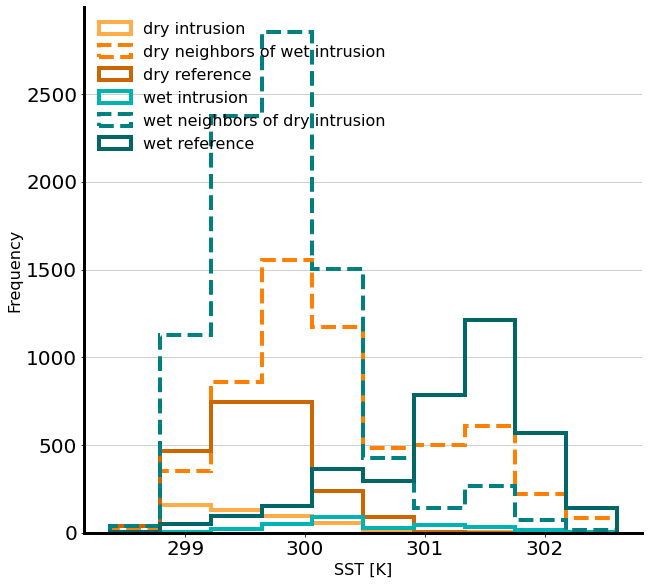

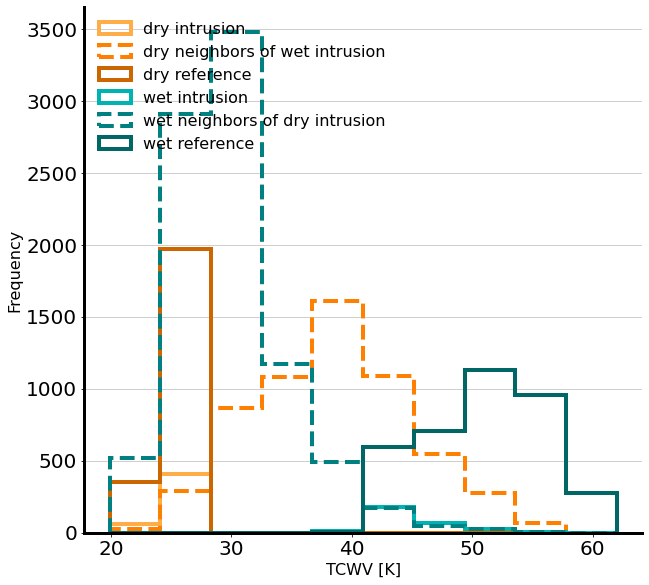

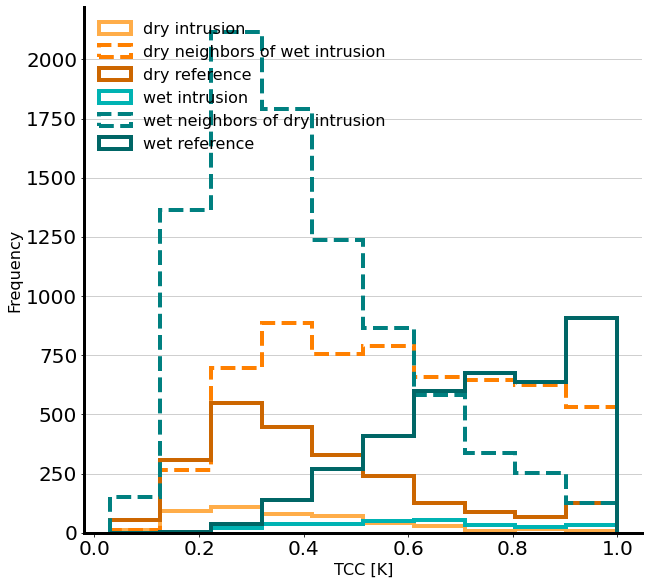

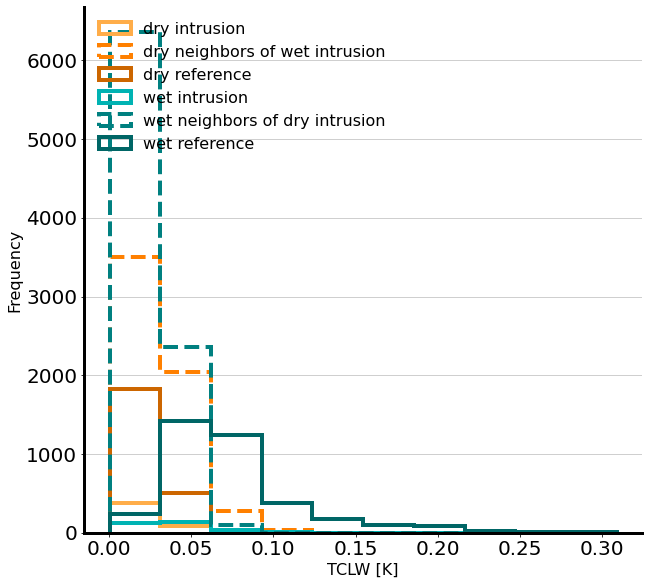

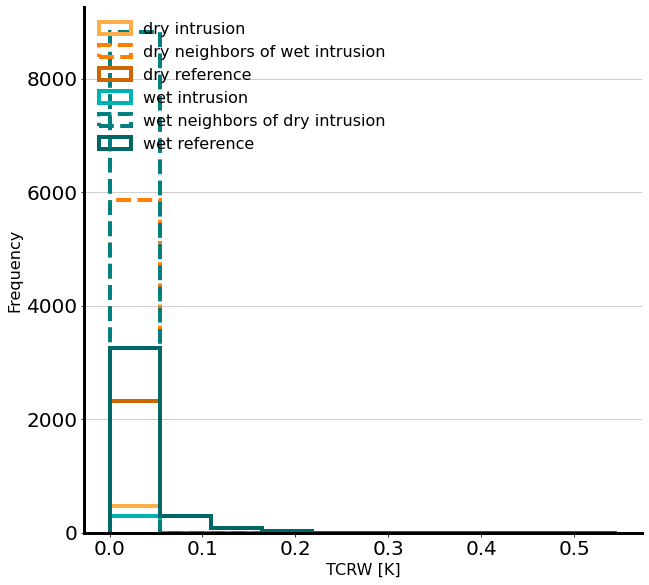

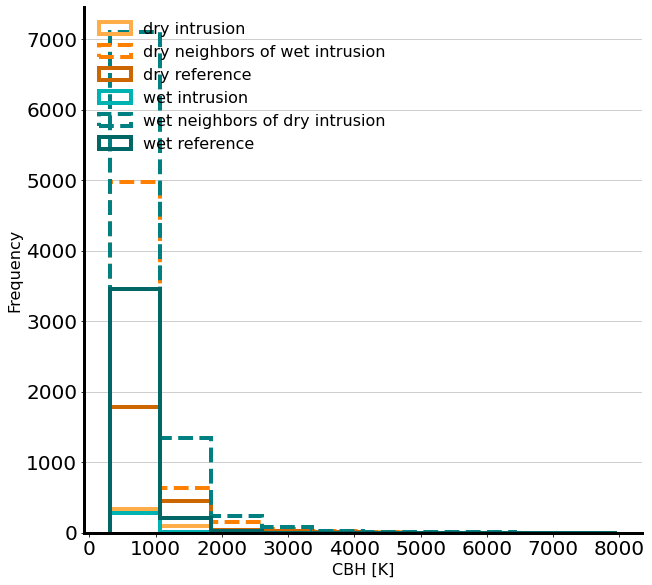

In [14]:
var_names = [ 'SST', 'TCWV', 'TCC', 'TCLW', 'TCRW', 'CBH']
for ind, var_name in enumerate(var_names):
    # reading SST variables
    var_wet_only = wet_only[var_name].values
    var_dry_nn_wet_intr = dry_nn_wet_intr[var_name].values
    var_dry_intrusion = dry_intrusion[var_name].values
    var_wet_intrusion = wet_intrusion[var_name].values
    var_wet_nn_dry_intr = wet_nn_dry_intr[var_name].values
    var_dry_only = dry_only[var_name].values

    # plot quicklook of filtered and corrected mdv for checking
    labelsizeaxes   = 14
    fontSizeTitle   = 16
    fontSizeX       = 16
    fontSizeY       = 16
    cbarAspect      = 10
    fontSizeCbar    = 16
    matplotlib.rcParams['savefig.dpi'] = 100
    plt.rcParams.update({'font.size':16})


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    #rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    matplotlib.rcParams['savefig.dpi'] = 100
    plt.gcf().subplots_adjust(bottom=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["left"].set_linewidth(3)

    minval = np.nanmin([np.nanmin(var_wet_only), \
                        np.nanmin(var_dry_nn_wet_intr), \
                        np.nanmin(var_dry_intrusion), \
                        np.nanmin(var_wet_intrusion), \
                        np.nanmin(var_dry_only), \
                        np.nanmin(var_wet_nn_dry_intr)])
    maxval = np.nanmax([np.nanmax(var_wet_only), \
                        np.nanmax(var_dry_nn_wet_intr), \
                        np.nanmax(var_dry_intrusion), \
                        np.nanmax(var_wet_intrusion), \
                        np.nanmax(var_dry_only), \
                        np.nanmax(var_wet_nn_dry_intr)])

    # An "interface" to matplotlib.axes.Axes.hist() method
   

    n_dd, bins_dd, patches_dd = ax.hist(x=var_dry_intrusion, bins=10, range=[minval, maxval], color=light_orange,\
                                     alpha=1, histtype="step", label='dry intrusion', align='mid', linewidth=4)
    n_w, bins_w, patches_w = ax.hist(x=var_dry_nn_wet_intr, bins=10, range=[minval, maxval], color=orange,\
                                                alpha=1, histtype="step",  label='dry neighbors of wet intrusion', \
                                     align='mid', linewidth=4, linestyle='--')
    n_do, bins_do, patches_do = ax.hist(x=var_dry_only, bins=10, range=[minval, maxval], color=dark_orange,\
                                                alpha=1, histtype="step", label='dry reference', align='mid', linewidth=4)
    n_ww, bins_ww, patches_ww = ax.hist(x=var_wet_intrusion, bins=10, range=[minval, maxval], color=light_teal,\
                                                alpha=1, histtype="step", label='wet intrusion', align='mid', linewidth=4)
    n_dn, bins_dn, patches_dn = ax.hist(x=var_wet_nn_dry_intr, bins=10, range=[minval, maxval], color=teal,\
                                                alpha=1, histtype="step", label='wet neighbors of dry intrusion', \
                                        align='mid', linewidth=4, linestyle='--')
    n_d, bins_d, patches_d = ax.hist(x=var_wet_only, bins=10, range=[minval, maxval], color=dark_teal,\
                                     alpha=1, histtype="step", label='wet reference', align='mid', linewidth=4)
    ax.legend(frameon=False, loc='upper left')
    ax.grid(axis='y', alpha=0.75)
    ax.set_xlabel(var_name+' [K]')
    ax.set_ylabel('Frequency')
    #maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #ax.set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    fig.savefig(path_out+var_name+'_all_areas.png', format='png')

/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_2621664/1763033216.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.se

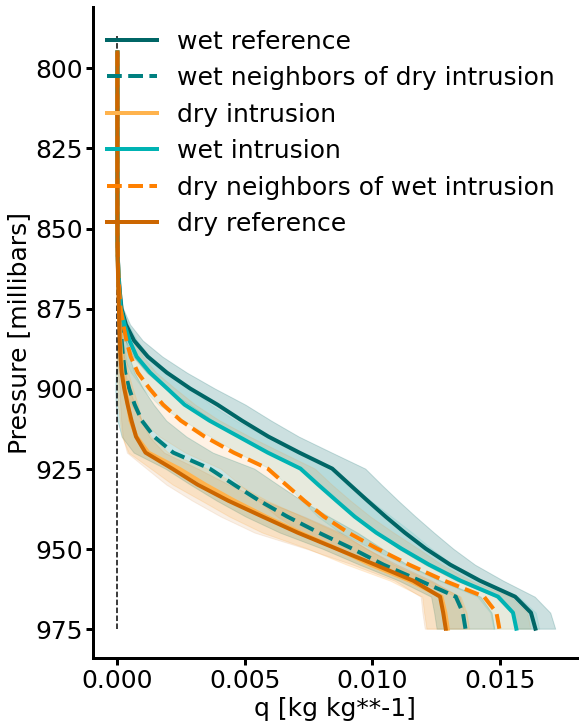

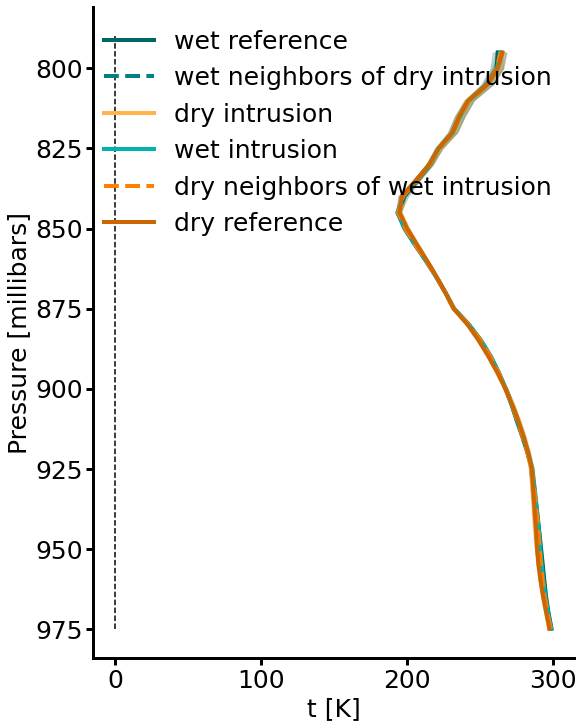

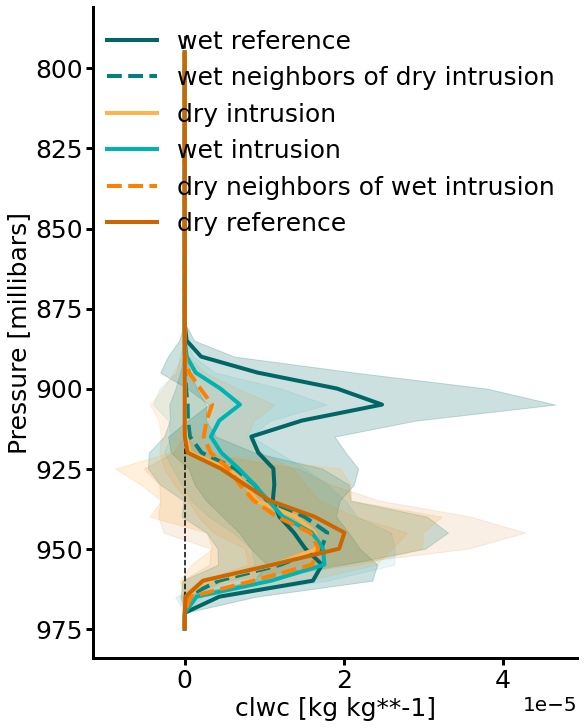

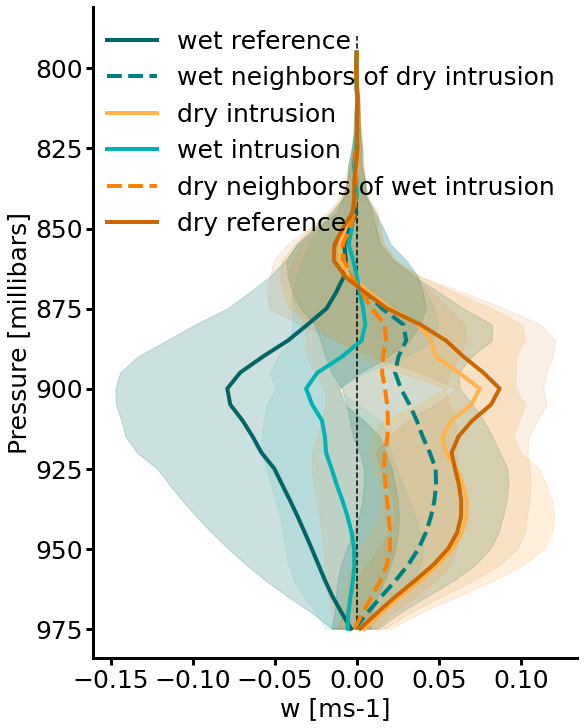

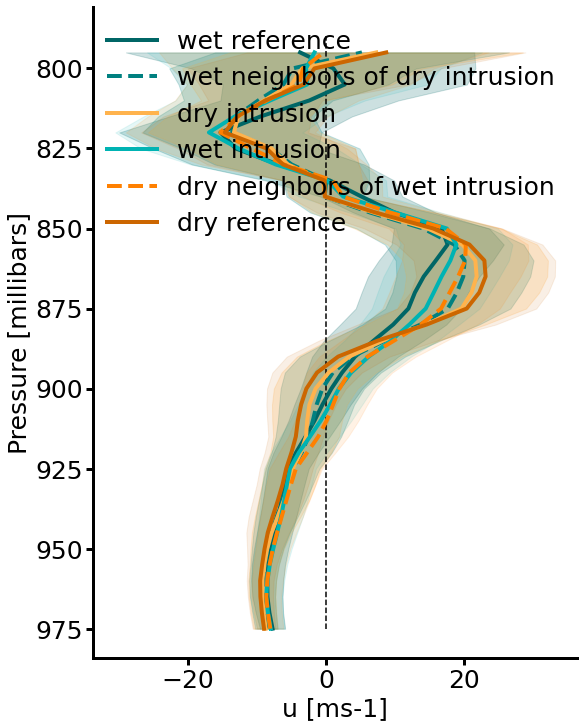

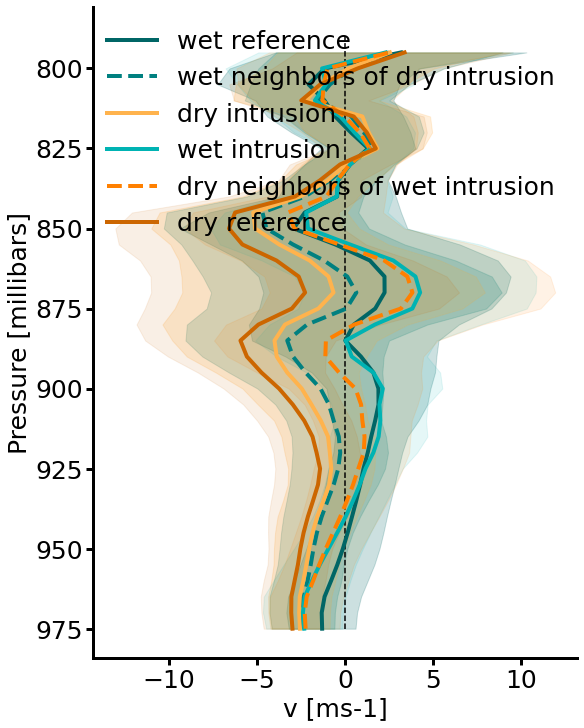

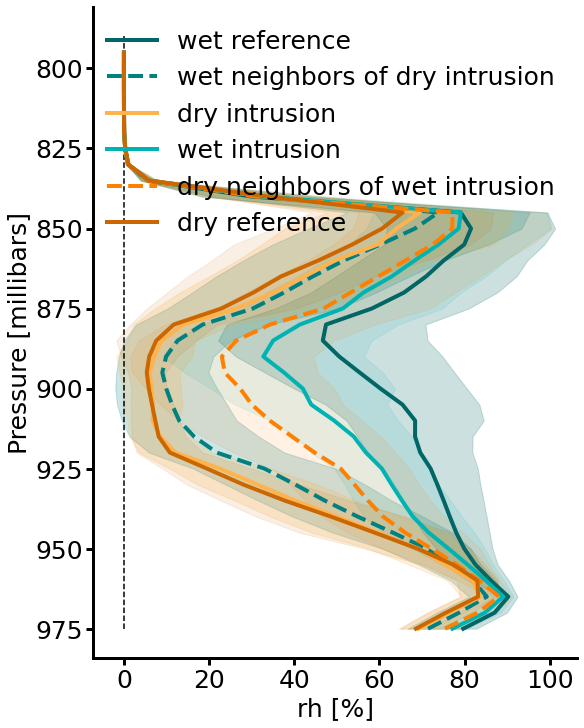

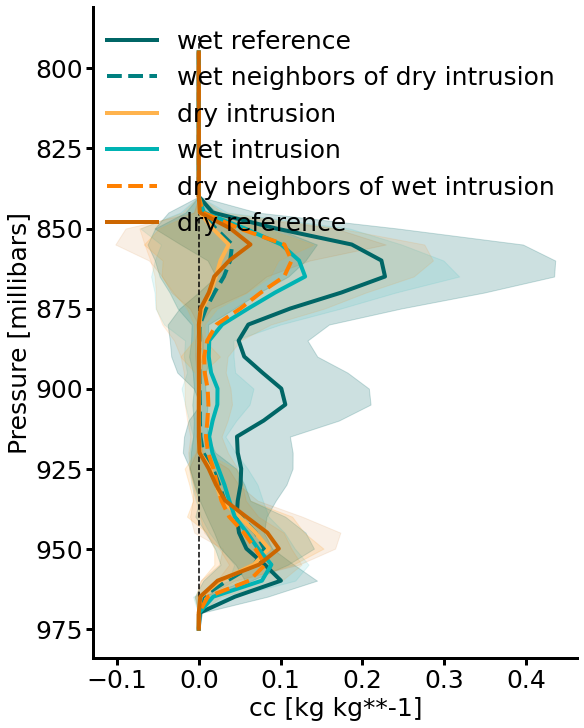

In [21]:
 # reading data from the dictionary for the plot
vars_list = ['q', 't', 'clwc', 'w', 'u', 'v', 'rh', 'cc']
# definition of the colors
light_orange = (255/255,round(173/255, 1),round(73/255, 1)) # dry intrusion
orange = (255./255,round(140/255,1), 0.)                    # dry neighbors of wet intrusion
dark_orange = (round(200/255, 1),round(110/255, 1),0.)      # dry reference
teal = (0., round(128/255, 1), round(128/255, 1))           # wet neighbors of dry intrusion
dark_teal = (0., round(91/255, 1), round(91/255, 1))        # wet reference 
light_teal = (0., round(182/255, 1), round(182/255, 1))     # wet intrusion
for ind_var, var_name in enumerate(vars_list):

    mean_wet = np.nanmean(wet_only[var_name].values, axis=0)
    std_wet = np.nanstd(wet_only[var_name].values, axis=0)
    
    mean_wet_nn_dry_intr = np.nanmean(wet_nn_dry_intr[var_name].values, axis=0)
    std_wet_nn_dry_intr = np.nanstd(wet_nn_dry_intr[var_name].values, axis=0)
    
    mean_dry_intrusion = np.nanmean(dry_intrusion[var_name].values, axis=0)
    std_dry_intrusion = np.nanstd(dry_intrusion[var_name].values, axis=0)
    
    mean_wet_intrusion = np.nanmean(wet_intrusion[var_name].values, axis=0)
    std_wet_intrusion = np.nanstd(wet_intrusion[var_name].values, axis=0)

    mean_dry_nn_wet_intr = np.nanmean(dry_nn_wet_intr[var_name].values, axis=0)
    std_dry_nn_wet_intr = np.nanstd(dry_nn_wet_intr[var_name].values, axis=0)
    
    mean_dry_only = np.nanmean(dry_only[var_name].values, axis=0)
    std_dry_only = np.nanstd(dry_only[var_name].values, axis=0)
    
    
    levels = wet_only.levels.values
    strlev = []
    for ind, lev in enumerate(levels):
        strlev.append(str(lev))

    dict_plot_settings = {
        'labelsizeaxes':25,
        'fontSizeTitle':25,
        'fontSizeX'    :25,
        'fontSizeY'    :25,
        'cbarAspect'   :25,
        'fontSizeCbar' :25,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :25,
        'grid'         :True}    
    fig, axs = plt.subplots(figsize=(8,10), constrained_layout=True)
    # plots settings defined by user at the top
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
    matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
    #ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['bottom'].set_linewidth(3)
    axs.spines['left'].set_linewidth(3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.vlines(0.,0, len(levels), linestyle='--', color='black')
    axs.tick_params(axis='both', labelsize=dict_plot_settings['labelsizeaxes'])    

    axs.plot(mean_wet, np.arange(len(levels)), linewidth=4, rasterized=True, color=dark_teal, label='wet reference')    
    axs.fill_betweenx(np.arange(len(levels)), mean_wet-std_wet, mean_wet+std_wet, color=dark_teal, alpha=0.2)

    axs.plot(mean_wet_nn_dry_intr, np.arange(len(levels)), color=teal, linewidth=4, rasterized=True, label='wet neighbors of dry intrusion', linestyle='--')    
    axs.fill_betweenx(np.arange(len(levels)), mean_wet_nn_dry_intr-std_wet_nn_dry_intr, mean_wet_nn_dry_intr+std_wet_nn_dry_intr, color=teal, alpha=0.2)

    axs.plot(mean_dry_intrusion, np.arange(len(levels)), color=light_orange, linewidth=4, rasterized=True, label='dry intrusion')    
    axs.fill_betweenx(np.arange(len(levels)), mean_dry_intrusion-std_dry_intrusion, mean_dry_intrusion+std_dry_intrusion, color=light_orange, alpha=0.2)

    axs.plot(mean_wet_intrusion, np.arange(len(levels)), color=light_teal, linewidth=4, rasterized=True, label='wet intrusion')  
    axs.fill_betweenx(np.arange(len(levels)), mean_wet_intrusion-std_wet_intrusion, mean_wet_intrusion+std_wet_intrusion, color=light_teal, alpha=0.1)

    axs.plot(mean_dry_nn_wet_intr, np.arange(len(levels)), color=orange, linewidth=4, rasterized=True, label='dry neighbors of wet intrusion', linestyle='--')   
    axs.fill_betweenx(np.arange(len(levels)), mean_dry_nn_wet_intr-std_dry_nn_wet_intr, mean_dry_nn_wet_intr+std_dry_nn_wet_intr, color=orange, alpha=0.1)

    axs.plot(mean_dry_only, np.arange(len(levels)), color=dark_orange, linewidth=4, rasterized=True, label='dry reference')  
    axs.fill_betweenx(np.arange(len(levels)), mean_dry_only-std_dry_only, mean_dry_only+std_dry_only, color=dark_orange, alpha=0.1)

    axs.set_ylabel('Pressure ['+wet_only.levels.units+']')
    axs.set_xlabel(var_name+' ['+wet_only[var_name].units+']')

    axs.set_yticklabels(strlev)
    axs.legend(frameon=False)
    #axs.set_xlim(-0.2, 0.2)
    fig.savefig(path_out+var_name+'_profiles_all_areas.png')


    n_w, bins_w, patches_w = ax.hist(x=var_dry_nn_wet_intr, bins=10, range=[minval, maxval], color=orange,\
                                                alpha=1, histtype="step",  label='dry neighbors of wet intrusion', \
                                     align='mid', linewidth=4, linestyle='--')
    n_do, bins_do, patches_do = ax.hist(x=var_dry_only, bins=10, range=[minval, maxval], color=dark_orange,\
                                                alpha=1, histtype="step", label='dry reference', align='mid', linewidth=4)
    n_ww, bins_ww, patches_ww = ax.hist(x=var_wet_intrusion, bins=10, range=[minval, maxval], color=light_teal,\
                                                alpha=1, histtype="step", label='wet intrusion', align='mid', linewidth=4)

